# PACKAGES AND LIBRARIES

In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D
from keras import models
from keras import layers
import tensorflow as tf
from tensorflow.keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from tensorflow.keras.utils import plot_model
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH & LABEL PROCESS

#### MAIN PATH

In [3]:
Fire_Dataset_Path = Path("fire_dataset\\")

#### PATH PROCESS

In [4]:
PNG_Path = list(Fire_Dataset_Path.glob(r"*/*.png"))

#### LABEL PROCESS

In [5]:
PNG_Labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1],PNG_Path))

In [6]:
print("FIRE: ", PNG_Labels.count("fire_images"))
print("NO_FIRE: ", PNG_Labels.count("non_fire_images"))

FIRE:  755
NO_FIRE:  244


# TRANSFORMATION TO SERIES STRUCTURE

In [7]:
PNG_Path_Series = pd.Series(PNG_Path,name="PNG").astype(str)
PNG_Labels_Series = pd.Series(PNG_Labels,name="CATEGORY")

In [8]:
print(PNG_Path_Series)

0               fire_dataset\fire_images\fire.1.png
1              fire_dataset\fire_images\fire.10.png
2             fire_dataset\fire_images\fire.100.png
3             fire_dataset\fire_images\fire.101.png
4             fire_dataset\fire_images\fire.102.png
                           ...                     
994    fire_dataset\non_fire_images\non_fire.95.png
995    fire_dataset\non_fire_images\non_fire.96.png
996    fire_dataset\non_fire_images\non_fire.97.png
997    fire_dataset\non_fire_images\non_fire.98.png
998    fire_dataset\non_fire_images\non_fire.99.png
Name: PNG, Length: 999, dtype: object


In [9]:
print(PNG_Labels_Series)

0          fire_images
1          fire_images
2          fire_images
3          fire_images
4          fire_images
            ...       
994    non_fire_images
995    non_fire_images
996    non_fire_images
997    non_fire_images
998    non_fire_images
Name: CATEGORY, Length: 999, dtype: object


In [10]:
PNG_Labels_Series.replace({"non_fire_images":"NO_FIRE","fire_images":"FIRE"},inplace=True)

In [11]:
print(PNG_Labels_Series)

0         FIRE
1         FIRE
2         FIRE
3         FIRE
4         FIRE
        ...   
994    NO_FIRE
995    NO_FIRE
996    NO_FIRE
997    NO_FIRE
998    NO_FIRE
Name: CATEGORY, Length: 999, dtype: object


# TRANSFORMATION TO DATAFRAME STRUCTURE

In [12]:
Main_Train_Data = pd.concat([PNG_Path_Series,PNG_Labels_Series],axis=1)

In [13]:
print(Main_Train_Data.head(-1))

                                              PNG CATEGORY
0             fire_dataset\fire_images\fire.1.png     FIRE
1            fire_dataset\fire_images\fire.10.png     FIRE
2           fire_dataset\fire_images\fire.100.png     FIRE
3           fire_dataset\fire_images\fire.101.png     FIRE
4           fire_dataset\fire_images\fire.102.png     FIRE
..                                            ...      ...
993  fire_dataset\non_fire_images\non_fire.94.png  NO_FIRE
994  fire_dataset\non_fire_images\non_fire.95.png  NO_FIRE
995  fire_dataset\non_fire_images\non_fire.96.png  NO_FIRE
996  fire_dataset\non_fire_images\non_fire.97.png  NO_FIRE
997  fire_dataset\non_fire_images\non_fire.98.png  NO_FIRE

[998 rows x 2 columns]


#### SHUFFLING

In [14]:
Main_Train_Data = Main_Train_Data.sample(frac=1).reset_index(drop=True)

In [15]:
print(Main_Train_Data.head(-1))

                                               PNG CATEGORY
0            fire_dataset\fire_images\fire.504.png     FIRE
1             fire_dataset\fire_images\fire.84.png     FIRE
2            fire_dataset\fire_images\fire.322.png     FIRE
3            fire_dataset\fire_images\fire.236.png     FIRE
4            fire_dataset\fire_images\fire.562.png     FIRE
..                                             ...      ...
993  fire_dataset\non_fire_images\non_fire.220.png  NO_FIRE
994          fire_dataset\fire_images\fire.387.png     FIRE
995  fire_dataset\non_fire_images\non_fire.198.png  NO_FIRE
996  fire_dataset\non_fire_images\non_fire.150.png  NO_FIRE
997          fire_dataset\fire_images\fire.163.png     FIRE

[998 rows x 2 columns]


In [16]:
print(Main_Train_Data["PNG"][2])
print(Main_Train_Data["CATEGORY"][2])
print(Main_Train_Data["PNG"][200])
print(Main_Train_Data["CATEGORY"][200])
print(Main_Train_Data["PNG"][45])
print(Main_Train_Data["CATEGORY"][45])
print(Main_Train_Data["PNG"][852])
print(Main_Train_Data["CATEGORY"][852])

fire_dataset\fire_images\fire.322.png
FIRE
fire_dataset\fire_images\fire.313.png
FIRE
fire_dataset\non_fire_images\non_fire.53.png
NO_FIRE
fire_dataset\fire_images\fire.65.png
FIRE


In [17]:
remove_PNG = 'fire_dataset/non_fire_images/non_fire.189.png'
Main_Train_Data = Main_Train_Data.loc[~(Main_Train_Data.loc[:,'PNG'] == remove_PNG),:]

In [18]:
print(Main_Train_Data.loc[Main_Train_Data.loc[:,'PNG'] == remove_PNG,:])

Empty DataFrame
Columns: [PNG, CATEGORY]
Index: []


* We need to remove Non_Fire_189, this PNG is broken

In [19]:
print(Main_Train_Data.head(-1))

                                               PNG CATEGORY
0            fire_dataset\fire_images\fire.504.png     FIRE
1             fire_dataset\fire_images\fire.84.png     FIRE
2            fire_dataset\fire_images\fire.322.png     FIRE
3            fire_dataset\fire_images\fire.236.png     FIRE
4            fire_dataset\fire_images\fire.562.png     FIRE
..                                             ...      ...
993  fire_dataset\non_fire_images\non_fire.220.png  NO_FIRE
994          fire_dataset\fire_images\fire.387.png     FIRE
995  fire_dataset\non_fire_images\non_fire.198.png  NO_FIRE
996  fire_dataset\non_fire_images\non_fire.150.png  NO_FIRE
997          fire_dataset\fire_images\fire.163.png     FIRE

[998 rows x 2 columns]


# VISUALIZATION

In [20]:
plt.style.use("dark_background")

#### GENERAL

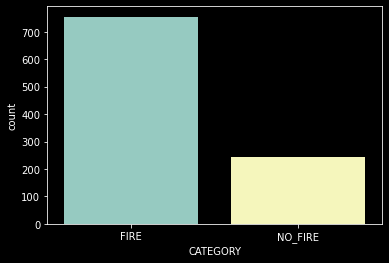

In [21]:
sns.countplot(Main_Train_Data["CATEGORY"])
plt.show()

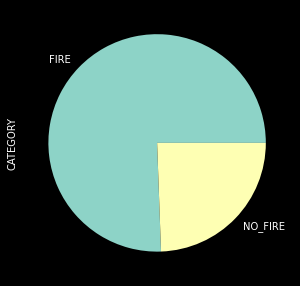

In [22]:
Main_Train_Data['CATEGORY'].value_counts().plot.pie(figsize=(5,5))
plt.show()

#### IMAGES

Text(0.5, 1.0, 'FIRE')

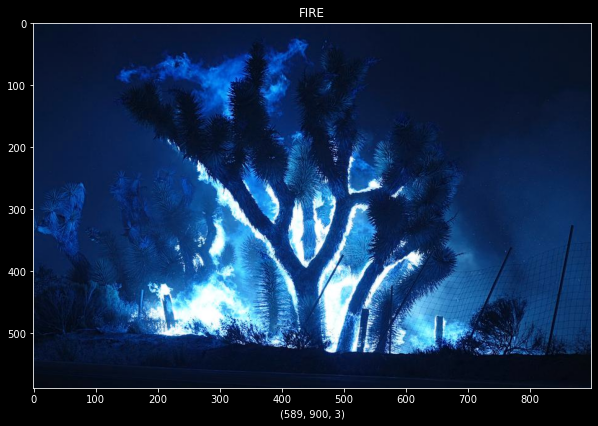

In [23]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][0])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][0])

Text(0.5, 1.0, 'NO_FIRE')

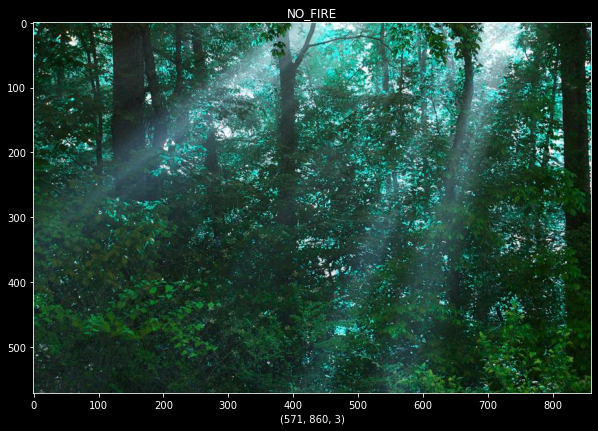

In [24]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][993])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][993])

Text(0.5, 1.0, 'FIRE')

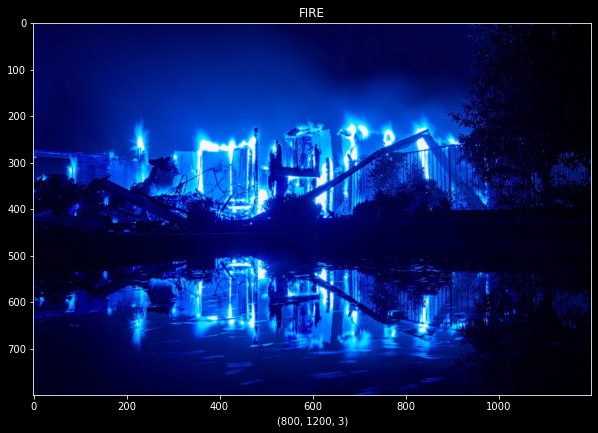

In [25]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][20])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][20])

Text(0.5, 1.0, 'NO_FIRE')

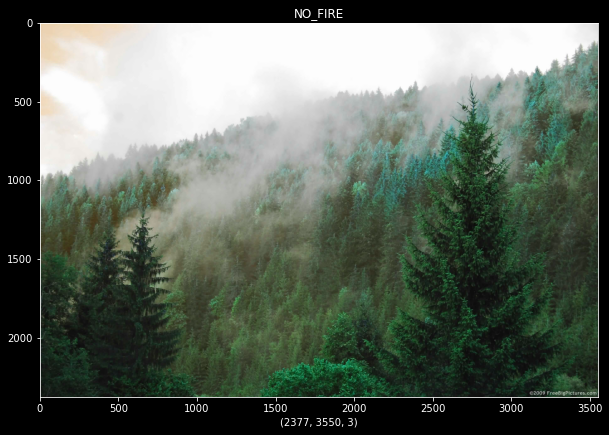

In [26]:
figure = plt.figure(figsize=(10,10))
x = cv2.imread(Main_Train_Data["PNG"][48])
plt.imshow(x)
plt.xlabel(x.shape)
plt.title(Main_Train_Data["CATEGORY"][48])

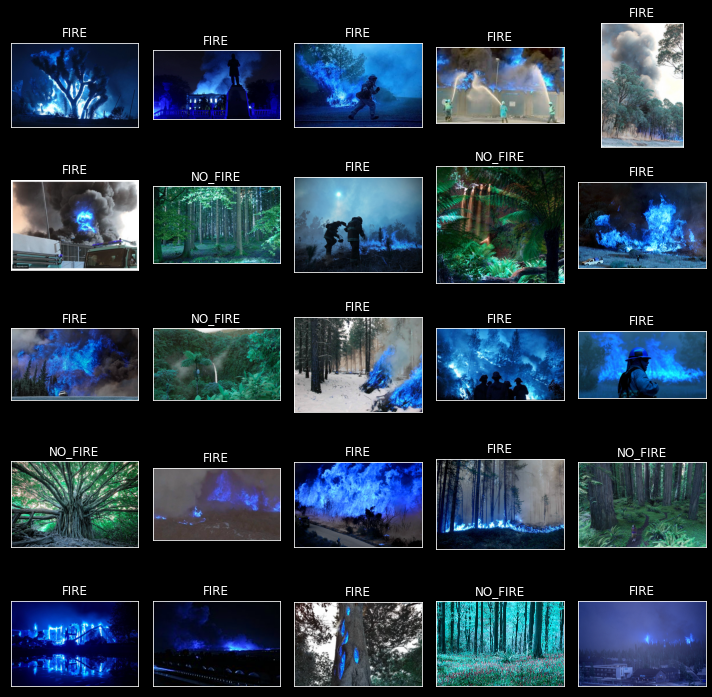

In [27]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Main_Train_Data["PNG"][i]))
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

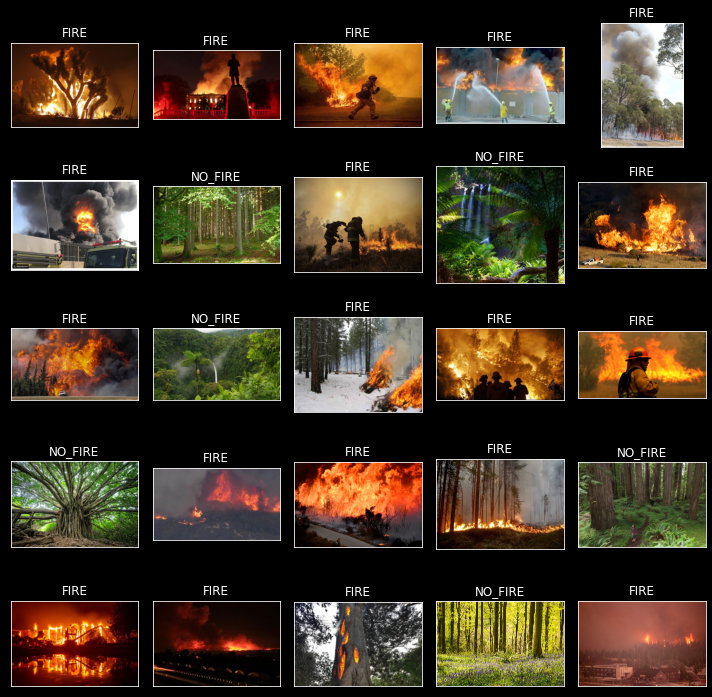

In [28]:
fig, axes = plt.subplots(nrows=5,
                        ncols=5,
                        figsize=(10,10),
                        subplot_kw={"xticks":[],"yticks":[]})

for i,ax in enumerate(axes.flat):
    x = cv2.imread(Main_Train_Data["PNG"][i])
    x = cv2.cvtColor(x,cv2.COLOR_RGB2BGR)
    ax.imshow(x)
    ax.set_title(Main_Train_Data["CATEGORY"][i])
plt.tight_layout()
plt.show()

# DETERMINATION TRAIN AND TEST DATA

#### IMAGE GENERATOR

In [29]:
Train_Generator = ImageDataGenerator(rescale=1./255,
                                    shear_range=0.3,
                                    zoom_range=0.2,
                                    brightness_range=[0.2,0.9],
                                    rotation_range=30,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    fill_mode="nearest",
                                    validation_split=0.1)

In [31]:
Test_Generator = ImageDataGenerator(rescale=1./255)

#### SPLITTING TRAIN AND TEST

In [32]:
Train_Data,Test_Data = train_test_split(Main_Train_Data,train_size=0.9,random_state=42,shuffle=True)

In [35]:
print("TRAIN SHAPE: ",Train_Data.shape)
print("TEST SHAPE: ",Test_Data.shape)

TRAIN SHAPE:  (899, 2)
TEST SHAPE:  (100, 2)


In [36]:
print(Train_Data.head(-1))
print("----"*20)
print(Test_Data.head(-1))

                                               PNG CATEGORY
599   fire_dataset\non_fire_images\non_fire.89.png  NO_FIRE
432          fire_dataset\fire_images\fire.266.png     FIRE
221          fire_dataset\fire_images\fire.560.png     FIRE
973          fire_dataset\fire_images\fire.169.png     FIRE
525  fire_dataset\non_fire_images\non_fire.223.png  NO_FIRE
..                                             ...      ...
71           fire_dataset\fire_images\fire.508.png     FIRE
106  fire_dataset\non_fire_images\non_fire.194.png  NO_FIRE
270  fire_dataset\non_fire_images\non_fire.131.png  NO_FIRE
860           fire_dataset\fire_images\fire.64.png     FIRE
435          fire_dataset\fire_images\fire.667.png     FIRE

[898 rows x 2 columns]
--------------------------------------------------------------------------------
                                               PNG CATEGORY
453          fire_dataset\fire_images\fire.692.png     FIRE
793  fire_dataset\non_fire_images\non_fire.238.png  NO_

In [37]:
print(Test_Data["CATEGORY"].value_counts())

FIRE       71
NO_FIRE    29
Name: CATEGORY, dtype: int64


In [38]:
encode = LabelEncoder()

In [39]:
For_Prediction_Class = encode.fit_transform(Test_Data["CATEGORY"])

#### How Generator Applied Image Look Like

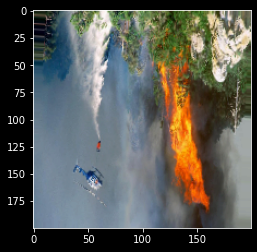

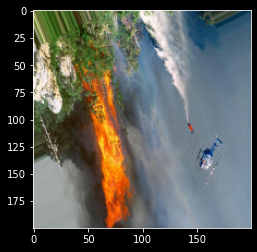

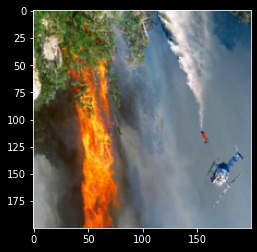

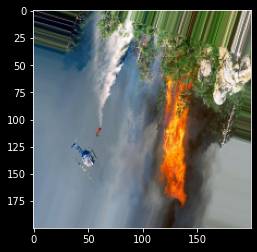

In [40]:
example_Image = Train_Data["PNG"][99]
Load_Image = image.load_img(example_Image,target_size=(200,200))
Array_Image = image.img_to_array(Load_Image)
Array_Image = Array_Image.reshape((1,) + Array_Image.shape)

i = 0
for batch in Train_Generator.flow(Array_Image,batch_size=1):
    plt.figure(i)
    IMG = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

#### APPLYING GENERATOR AND TRANSFORMATION TO TENSOR

In [41]:
Train_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="training")

Found 810 validated image filenames belonging to 2 classes.


In [42]:
Validation_IMG_Set = Train_Generator.flow_from_dataframe(dataframe=Train_Data,
                                                   x_col="PNG",
                                                   y_col="CATEGORY",
                                                   color_mode="rgb",
                                                   class_mode="categorical",
                                                   batch_size=32,
                                                   subset="validation")

Found 89 validated image filenames belonging to 2 classes.


In [43]:
Test_IMG_Set = Test_Generator.flow_from_dataframe(dataframe=Test_Data,
                                                 x_col="PNG",
                                                 y_col="CATEGORY",
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 batch_size=32)

Found 100 validated image filenames belonging to 2 classes.


#### CHECKING

In [44]:
for data_batch,label_batch in Train_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [45]:
for data_batch,label_batch in Validation_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [46]:
for data_batch,label_batch in Test_IMG_Set:
    print("DATA SHAPE: ",data_batch.shape)
    print("LABEL SHAPE: ",label_batch.shape)
    break

DATA SHAPE:  (32, 256, 256, 3)
LABEL SHAPE:  (32, 2)


In [47]:
print("TRAIN: ")
print(Train_IMG_Set.class_indices)
print(Train_IMG_Set.classes[0:5])
print(Train_IMG_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_IMG_Set.class_indices)
print(Validation_IMG_Set.classes[0:5])
print(Validation_IMG_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_IMG_Set.class_indices)
print(Test_IMG_Set.classes[0:5])
print(Test_IMG_Set.image_shape)

TRAIN: 
{'FIRE': 0, 'NO_FIRE': 1}
[1, 0, 0, 1, 0]
(256, 256, 3)
------------------------------------------------------------
VALIDATION: 
{'FIRE': 0, 'NO_FIRE': 1}
[1, 0, 0, 0, 1]
(256, 256, 3)
------------------------------------------------------------
TEST: 
{'FIRE': 0, 'NO_FIRE': 1}
[0, 1, 0, 1, 1]
(256, 256, 3)


# CNN

In [48]:
Model = Sequential()

Model.add(Conv2D(32,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(64,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.2))
Model.add(MaxPooling2D((2,2)))

#
Model.add(Conv2D(128,(3,3),
                 activation="relu",padding="same"))
Model.add(Dropout(0.5))
Model.add(MaxPooling2D((2,2)))


#
Model.add(Flatten())
Model.add(Dense(256,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(1,activation="sigmoid"))

In [49]:
Call_Back = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=5,mode="min")

In [50]:
Model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [51]:
CNN_Model = Model.fit(Train_IMG_Set,
                      validation_data=Validation_IMG_Set,
                            callbacks=Call_Back,
                      epochs=50)

Epoch 1/50
26/26 [==============================] - 207s 8s/step - loss: 21.6575 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
23/26 [=========================>....] - ETA: 16s - loss: 0.6934 - accuracy: 0.5000

KeyboardInterrupt: 

#### CHECKING

In [ ]:
print(Model.summary())

In [49]:
# plot_model(Model,to_file="Model_One.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [50]:
Model_Results = Model.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.2f" % Model_Results[1])

4/4 [==============================] - 5s 1s/step - loss: 0.6931 - accuracy: 0.5000
LOSS:  0.6931
ACCURACY:  0.50


No handles with labels found to put in legend.


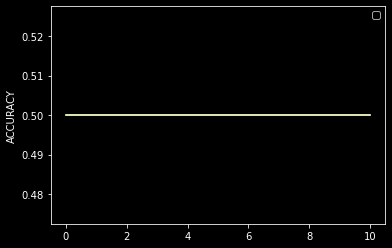

In [51]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

No handles with labels found to put in legend.


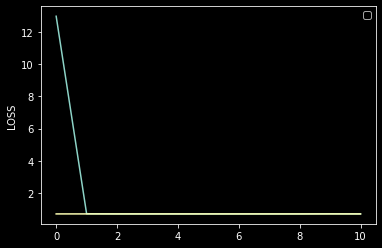

In [52]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

No handles with labels found to put in legend.


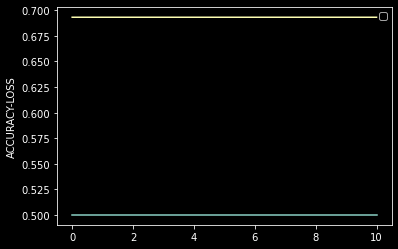

In [53]:
plt.plot(CNN_Model.history["val_accuracy"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("ACCURACY-LOSS")
plt.legend()
plt.show()

<AxesSubplot:>

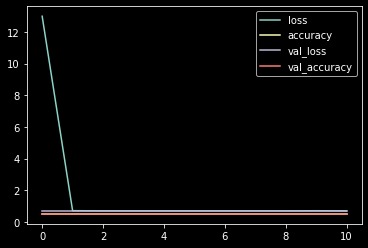

In [54]:
Dict_Summary_One = pd.DataFrame(CNN_Model.history)
Dict_Summary_One.plot()

#### PREDICTION

In [55]:
Prediction_One = Model.predict(Test_IMG_Set)
Prediction_One = Prediction_One.argmax(axis=-1)

In [56]:
print(Prediction_One)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [57]:
Predict_Class = Model.predict_classes(Test_IMG_Set)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [ ]:
print(Predict_Class)

* {'FIRE': 0, 'NO_FIRE': 1}

In [ ]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Test_Data["PNG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Predict_Class[i]}")
plt.tight_layout()
plt.show()

#### CLASSIFICATION & CONFUSION REPORT

In [ ]:
print(confusion_matrix(For_Prediction_Class,Predict_Class))

In [ ]:
print(classification_report(For_Prediction_Class,Predict_Class))

#### PREDICTION FOR DIFFERENT SOURCE

* FIRE

In [ ]:
image_path = "../input/test-dataset/Fire-Detection/1/12.jpg"
img = image.load_img(image_path,target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

In [ ]:
Diff_Pred = Model.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

* NOT FIRE

In [ ]:
image_path_Two = "../input/test-dataset/Fire-Detection/0/12.jpg"
img_Two = image.load_img(image_path_Two,target_size=(256,256))
x_Two = image.img_to_array(img_Two)
x_Two = np.expand_dims(x_Two,axis=0)

In [ ]:
Diff_Pred_Two = Model.predict(x_Two)
Diff_Pred_Two = Diff_Pred_Two.argmax(axis=-1)
print(Diff_Pred_Two)

# FULLY-CONNECTED

In [ ]:
Model_Two = tf.keras.models.Sequential([
  # inputs 
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Flatten(input_shape=(256,)),
  # hiddens layers
  tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  # output layer
  tf.keras.layers.Dense(2,activation="softmax")
])

In [ ]:
Model_Two.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
ANN_Model = Model_Two.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=Call_Back,
                      epochs=100)

#### CHECKING

In [ ]:
print(Model_Two.summary())

In [ ]:
plot_model(Model_Two,to_file="Model_Two.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [ ]:
Model_Results_Two = Model_Two.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results_Two[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Two[1])

In [ ]:
plt.plot(ANN_Model.history["accuracy"])
plt.plot(ANN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [ ]:
plt.plot(ANN_Model.history["loss"])
plt.plot(ANN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.plot(ANN_Model.history["val_accuracy"])
plt.plot(ANN_Model.history["val_loss"])
plt.ylabel("ACCURACY-LOSS")
plt.legend()
plt.show()

In [ ]:
Dict_Summary_Two = pd.DataFrame(ANN_Model.history)
Dict_Summary_Two.plot()

#### PREDICTION

In [ ]:
Prediction_Two = Model_Two.predict(Test_IMG_Set)
Prediction_Two = Prediction_Two.argmax(axis=-1)

In [ ]:
print(Prediction_Two)

In [ ]:
Prediction_Class_Two = Model_Two.predict_classes(Test_IMG_Set)

In [ ]:
print(Prediction_Class_Two)

* {'FIRE': 0, 'NO_FIRE': 1}

In [ ]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Test_Data["PNG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Prediction_Two[i]}")
plt.tight_layout()
plt.show()

#### CLASSIFICATION & CONFUSION REPORT

In [ ]:
print(confusion_matrix(For_Prediction_Class,Prediction_Class_Two))

In [ ]:
print(classification_report(For_Prediction_Class,Prediction_Class_Two))

#### PREDICTION FOR ANOTHER SOURCE

* FIRE

In [ ]:
image_path = "../input/test-dataset/Fire-Detection/1/12.jpg"
img = image.load_img(image_path,target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

In [ ]:
Diff_Pred = Model_Two.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

* NOT FIRE

In [ ]:
image_path_Two = "../input/test-dataset/Fire-Detection/0/12.jpg"
img_Two = image.load_img(image_path_Two,target_size=(256,256))
x_Two = image.img_to_array(img_Two)
x_Two = np.expand_dims(x_Two,axis=0)

In [ ]:
Diff_Pred_Two = Model_Two.predict(x_Two)
Diff_Pred_Two = Diff_Pred_Two.argmax(axis=-1)
print(Diff_Pred_Two)

# CNN-RCNN

In [ ]:
Model_Three = Sequential()

Model_Three.add(Conv2D(12,(3,3),activation="relu",
                 input_shape=(256,256,3)))
Model_Three.add(BatchNormalization())
Model_Three.add(MaxPooling2D((2,2)))

#
Model_Three.add(Conv2D(24,(3,3),
                 activation="relu"))
Model_Three.add(Dropout(0.2))
Model_Three.add(MaxPooling2D((2,2)))


#
Model_Three.add(TimeDistributed(Flatten()))
Model_Three.add(Bidirectional(LSTM(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))
Model_Three.add(Bidirectional(GRU(32,
                                  return_sequences=True,
                                  dropout=0.5,
                                  recurrent_dropout=0.5)))

#
Model_Three.add(Flatten())

Model_Three.add(Dense(256,activation="relu"))
Model_Three.add(Dropout(0.5))
Model_Three.add(Dense(2,activation="softmax"))

In [ ]:
Model_Three.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

In [ ]:
RCNN_Model = Model_Three.fit(Train_IMG_Set,
                          validation_data=Validation_IMG_Set,
                          callbacks=Call_Back,
                      epochs=100)

In [ ]:
print(Model_Three.summary())

In [ ]:
plot_model(Model_Three,to_file="Model_Three.png",show_layer_names=True,show_dtype=True,show_shapes=True)

In [ ]:
Model_Results_Three = Model_Three.evaluate(Test_IMG_Set)
print("LOSS:  " + "%.4f" % Model_Results_Three[0])
print("ACCURACY:  " + "%.2f" % Model_Results_Three[1])

In [ ]:
plt.plot(RCNN_Model.history["accuracy"])
plt.plot(RCNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

In [ ]:
plt.plot(RCNN_Model.history["loss"])
plt.plot(RCNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
plt.plot(RCNN_Model.history["val_accuracy"])
plt.plot(RCNN_Model.history["val_loss"])
plt.ylabel("ACCURACY-LOSS")
plt.legend()
plt.show()

In [ ]:
Dict_Summary_Three = pd.DataFrame(RCNN_Model.history)
Dict_Summary_Three.plot()

In [ ]:
Prediction_Three = Model_Three.predict(Test_IMG_Set)
Prediction_Three = Prediction_Three.argmax(axis=-1)

In [ ]:
print(Prediction_Three)

* {'FIRE': 0, 'NO_FIRE': 1}

In [ ]:
Prediction_Class_Three = Model_Three.predict_classes(Test_IMG_Set)

In [ ]:
print(Prediction_Class_Three)

In [ ]:
fig, axes = plt.subplots(nrows=8,
                         ncols=8,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(cv2.imread(Test_Data["PNG"].iloc[i]))
    ax.set_title(f"TEST:{Test_Data.CATEGORY.iloc[i]}\n PREDICTION:{Prediction_Three[i]}")
plt.tight_layout()
plt.show()

#### CLASSIFICATION & CONFUSION REPORT

In [ ]:
print(classification_report(For_Prediction_Class,Prediction_Three))

In [ ]:
print(confusion_matrix(For_Prediction_Class,Prediction_Three))

##### PREDICTION FOR DIFFERENT SOURCE

* FIRE

In [ ]:
image_path = "../input/test-dataset/Fire-Detection/1/12.jpg"
img = image.load_img(image_path,target_size=(256,256))
x = image.img_to_array(img)
x = np.expand_dims(x,axis=0)

In [ ]:
Diff_Pred = Model_Three.predict(x)
Diff_Pred = Diff_Pred.argmax(axis=-1)
print(Diff_Pred)

[0]

* NOT FIRE

In [ ]:
image_path_Two = "../input/test-dataset/Fire-Detection/0/12.jpg"
img_Two = image.load_img(image_path_Two,target_size=(256,256))
x_Two = image.img_to_array(img_Two)
x_Two = np.expand_dims(x_Two,axis=0)

In [ ]:
Diff_Pred_Three = Model_Three.predict(x)
Diff_Pred_Three = Diff_Pred_Three.argmax(axis=-1)
print(Diff_Pred_Three)

[1]